In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [ ]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
x_tr_sc

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_6 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
hist=model.fit(x_tr_sc,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8689 - val_loss: 0.3464 - val_accuracy: 0.8619
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8681 - val_loss: 0.3472 - val_accuracy: 0.8562
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8680 - val_loss: 0.3474 - val_accuracy: 0.8631
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8647 - val_loss: 0.3466 - val_accuracy: 0.8619
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8670 - val_loss: 0.3477 - val_accuracy: 0.8562
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8677 - val_loss: 0.3476 - val_accuracy: 0.8637
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8659 - val_loss: 0.3467 - val_accuracy: 0.8644

In [ ]:
model.layers[0].get_weights()

[array([[-0.23155738,  0.07667797,  0.05561423, -0.1420569 , -0.11494204,
         -0.18178223, -0.01161421, -0.16585073,  0.02336259,  0.02130898,
         -0.05969355],
        [-0.19527218,  0.26903892, -0.56088567,  0.98366874, -0.07647431,
          0.09501711, -0.9661983 ,  0.5405929 , -0.02862095, -0.07312559,
         -0.71832937],
        [-0.27980426,  0.15851656, -0.3830426 ,  0.13586538,  0.04356435,
          0.5138793 ,  0.06426929, -0.18537667,  0.03776189,  0.12505418,
         -0.0370985 ],
        [-0.28123143,  0.20908287, -0.72489   ,  0.11358093,  1.0450222 ,
          0.22969887,  0.14617118, -0.46368214,  0.20629704, -0.04738021,
          0.14639236],
        [ 0.31974164,  0.400194  ,  0.6859757 ,  0.3351559 ,  0.60455674,
         -0.02171922, -0.08001758, -0.648573  ,  1.1678928 , -1.1296124 ,
          0.02748034],
        [-0.3285202 ,  0.24553989, -0.21168576, -0.1591879 ,  0.02009199,
          0.13646838,  0.05774122, -0.17773996,  0.02458846,  0.0291883

In [ ]:
y_log=model.predict(x_te_sc)

In [ ]:
y_pr=np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pr)

0.8635

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
hist.history

{'loss': [0.31798991560935974,
  0.31882184743881226,
  0.318285197019577,
  0.3176049292087555,
  0.31833964586257935,
  0.3179054260253906,
  0.3177695870399475,
  0.31809696555137634,
  0.31702321767807007,
  0.31673747301101685,
  0.317261666059494,
  0.31674090027809143,
  0.3159209191799164,
  0.3168375492095947,
  0.31592637300491333,
  0.3158103823661804,
  0.3163050711154938,
  0.3166308104991913,
  0.31540870666503906,
  0.31607726216316223,
  0.314973384141922,
  0.3152700960636139,
  0.31526482105255127,
  0.31452906131744385,
  0.3147938847541809,
  0.31491753458976746,
  0.3149309456348419,
  0.31387409567832947,
  0.3146530091762543,
  0.3140636384487152,
  0.3137761652469635,
  0.3133474290370941,
  0.31376463174819946,
  0.3130534887313843,
  0.3135010004043579,
  0.31315678358078003,
  0.31314656138420105,
  0.313142865896225,
  0.31301072239875793,
  0.31292951107025146,
  0.31287291646003723,
  0.31290704011917114,
  0.3134188652038574,
  0.3126195967197418,
  0.312

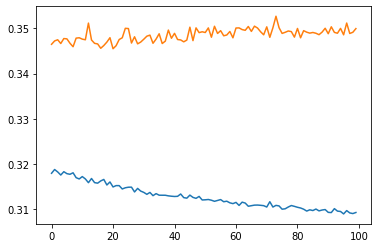

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])